## This tutorial presents how to simulate the full network with constant input currents into arbitrary set of neurons.

## Step 1: Import necessary packages and modules

In [1]:
# This line allows you to display matplotlib plots within the Jupyter Notebook
%matplotlib inline

# Import External packages 

import os
import numpy as np
import matplotlib.pyplot as plt

# Configure the working directory (Important: This should be set to home directory of 'dynworm' folder)

default_dir = os.path.dirname(os.getcwd())
os.chdir(default_dir)

# Import Main module

import dynworm as dw

## Step 2: Initialize neural parameters and connectivity matrices
### Before running any simulation, neural parameters (i.e. physiological constants. See neural_params.py for detail) and network connectivity matrices (gap, synaptic and directionalities of neurons) must be initialized 
### This process is carried out by dynworm.network_sim.initialize_params_neural() and dynworm.network_sim.initialize_connectivity(). Note that neural parameters must be initialized ahead of connectivity matrices
### Once initialized, both neural and connectivity parameters live in an object dynworm.network_sim.params_obj_neural
### params_obj_neural is a global variable for dynworm.network_sim module and can be modified by users (see tutorial 3)
### When not given any arguments (as shown below), the initialization functions can be used to reset the parameter space to default values 

In [2]:
dw.network_sim.initialize_params_neural(dw.neural_params.pA_unit)
dw.network_sim.initialize_connectivity()

## Step 3: Define constant input and ablation vectors
### Constant input should be a vector of shape (279, ) (defined as input_vec below) where each index defines the constant current for that neuron throughout the simulation 
### Ablation vector is a boolean vector of shape (279, ) (defined as ablation_mask below) where True = not ablated, False = ablated.
### For an intact connectome, ablation vector should be vector of all ones

In [3]:
input_vec = np.zeros(dw.network_sim.params_obj_neural['N'])
ablation_mask = np.ones(dw.network_sim.params_obj_neural['N'], dtype = 'bool')

## Step 4: Configure constant stimuli into neurons
### Enter the normalized stimuli amplitude to the neurons to be stimulated (This may be updated in future to enter explicit nA instead)
### The normalized stimuli amplitude has following conversion: 0 - 1 (normalized) <--> 0 - 10nA (nano-ampere)
### e.g. 0.2 (normalized stimuli) is equivalent to 2nA
### Use neurons_list in dynworm.neurons_idx module to quickly navigate the indices of the neurons of your interest

In [4]:
# neurons_idx module has dictionary 'neurons_list' where you can easily reference the information about neurons of interest
# degree: total number of synaptic inputs 
# group: group name of neuron

neurons_list = dw.neurons_idx.neurons_list
neurons_list[276]

{'index': 276, 'group': 'sensory', 'name': 'PLMR', 'degree': 2.0}

### In this example, we are injecting 2nA constant current into PLMR (276th index) and PLML (278th index)

In [15]:
input_vec[276] = 15000 #pA
input_vec[278] = 15000

## Step 5: Run the simulation
### network_sim.run_network_constinput simulates the network when given a constant input vector and ablation vector, alongside with following arguments
### t_start: start time of the simulation in seconds
### t_final: end time of the simulation in seconds 
### t_delta: time resolution of simulation in seconds. This is not to be confused with integration step, which is determined internally
### input_vec: the input vector with configured constant input currents
### ablation_mask: the ablation vector which define any neurons to be ablated
### In this example, we set t_start = 0s, t_final = 15s and t_delta = 0.01s

In [16]:
result_dict = dw.network_sim.run_network_constinput(t_duration=15, 
                                                    input_vec = input_vec, ablation_mask = ablation_mask)

All neurons are healthy
Network integration prep completed...
Computing network dynamics...
11.1% completed
22.2% completed
33.3% completed
44.4% completed
55.5% completed
66.6% completed
77.7% completed
88.9% completed
100.0% completed


## Step 6: Extract the result
### run_network_constinput outputs a dictionary object with following keys
### 'v_solution' :  Normalized membrane voltage activities of all neurons in respect to their resting potential (dimension: timepoints x 279)
### 'steps' : number of solution points between t_start and t_final
### 't' : time vector of the simulation 
### 'trajectory_mat':  Pre-normalized membrane voltage activities of all neurons (dimension: timepoints x 279)
### 'v_threshold': The resting potentials of all neurons given the constant input profile 

In [17]:
result_dict.keys()

dict_keys(['t', 'dt', 'steps', 'raw_v_solution', 'v_threshold', 'v_solution'])

### In this example, we will take a look at the 'v_solution' 
### We take transpose of 'v_solution' to change its shape to spatial axis of neurons x temporal axis 

In [18]:
v_sol = result_dict['v_solution'].T

### One can use matplotlib.pyplot.pcolor to visualize the activities of all neurons 

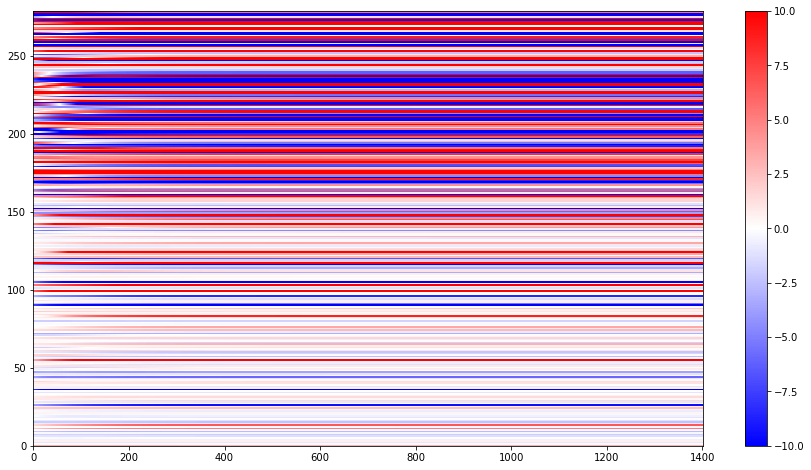

In [19]:
fig = plt.figure(figsize=(15, 8))
plt.pcolor(v_sol[:, 100:], cmap='bwr', vmin = -10, vmax = 10)
plt.colorbar()

### Or only the motorneuronal activities

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.pcolor(v_sol[dw.neurons_idx.motor_group, 100:], cmap='bwr', vmin = -3, vmax = 3)
plt.ylim(len(dw.neurons_idx.motor_group), 0)
plt.colorbar()

### Here we show the activities of Ventral Type B, D and Dorsal Type B, D neurons

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(4,1,1)
plt.pcolor(v_sol[dw.neurons_idx.VB_ind, 100:600], cmap='bwr')
plt.ylim(len(dw.neurons_idx.VB_ind), 0)
plt.colorbar()

fig = plt.figure(figsize=(12, 8))
plt.subplot(4,1,2)
plt.pcolor(v_sol[dw.neurons_idx.VD_ind, 100:600], cmap='bwr')
plt.ylim(len(dw.neurons_idx.VD_ind), 0)
plt.colorbar()

fig = plt.figure(figsize=(12, 8))
plt.subplot(4,1,3)
plt.pcolor(v_sol[dw.neurons_idx.DB_ind, 100:600], cmap='bwr')
plt.ylim(len(dw.neurons_idx.DB_ind), 0)
plt.colorbar()

fig = plt.figure(figsize=(12, 8))
plt.subplot(4,1,4)
plt.pcolor(v_sol[dw.neurons_idx.DD_ind, 100:600], cmap='bwr')
plt.ylim(len(dw.neurons_idx.DD_ind), 0)
plt.colorbar()